# Домашнее задание по библиотеке NetworkX

In [33]:
from pathlib import Path

import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Загрузить данные о рейсах авиакомпании Аэрофлот (исходные данные доступны по ссылке: https://www.aeroflot.ru/ru-ru/online_services/flights/ways_map/ways_map_table).

In [34]:
def parse_time(time: str) -> float:
    parts = time.split(':', maxsplit=1)
    return int(parts[0]) * 60 + int(parts[1])

In [35]:
path = Path.cwd().parent.parent / 'data' / 'datasets' / 'aeroflot.txt'

In [36]:
with open(path, 'r', encoding='utf8') as fin:
    lines = fin.readlines()

codes, sources, targets, distances, durations, time_diffs = \
    [], [], [], [], [], []

for idx in range(0, len(lines), 7):
    code = lines[idx].strip()
    destination = lines[idx + 1].strip()

    try:
        time_diff = float(lines[idx + 6].strip().replace(',', '.'))
    except:
        time_diff = 0.0

    codes.append(code)
    sources.append("Москва")
    targets.append(destination)
    distances.append(int(lines[idx + 2].strip()))
    durations.append(
        parse_time(lines[idx + 4].strip())
    )

    time_diffs.append(time_diff)

    codes.append(code)
    sources.append(destination)
    targets.append("Москва")
    distances.append(int(lines[idx + 3].strip()))
    durations.append(
        parse_time(lines[idx + 5].strip())
    )

    time_diffs.append(time_diff)

aeroflot_data = pd.DataFrame(
    {
        'code': codes,
        'source': sources,
        'target': targets,
        'distance': distances,
        'duration': durations,
        'time_diff': time_diffs
    }
)

aeroflot_data.head()

,code,source,target,distance,duration,time_diff
0,AAQ,Москва,Анапа,1400,141,0.0
1,AAQ,Анапа,Москва,1460,138,0.0
2,ABA,Москва,Абакан,3560,275,4.0
3,ABA,Абакан,Москва,3570,299,4.0
4,AER,Москва,Адлер/Сочи,1605,156,0.0


## Задание 1 (1 балл)
Создайте граф и добавьте в него $5$ вершин с городами России, у каждой должен быть атрибут (характеристика) `time_diff`, означающий временную разницу с Москвой в часах.

In [37]:
g1 = nx.Graph()

for _, row in aeroflot_data[
    (aeroflot_data.source == "Москва") & 
    (aeroflot_data.time_diff != 0.0)
].head(5).iterrows():
    g1.add_node(row.target, time_diff=row.time_diff)

for node in g1.nodes():
    print(node, g1.nodes[node])

Абакан {'time_diff': 4.0}
Астрахань {'time_diff': 1.0}
Барнаул {'time_diff': 4.0}
Челябинск {'time_diff': 2.0}
Ханты-Мансийск {'time_diff': 2.0}


## Задание 2 (1 балл)
Выберите какую-нибудь конкретную авиакомпанию (Аэрофлот, S7, Utair, etc).

В созданный граф добавьте рёбра между выбранными $5$ю городами, между которыми есть авиарейсы данной компании. У каждого ребра должны быть следующие атрибуты:
- расстояние между городами в километрах `distance`
- время перелёта в минутах `time`

При желании можно добавить в граф также несколько городов, являющихся пересадочными пунктами.

In [38]:
g2 = nx.Graph()

for _, row in aeroflot_data.iterrows():
    g2.add_edge(
        row.source, 
        row.target,
        distance=row.distance,
        time=row.duration
    )

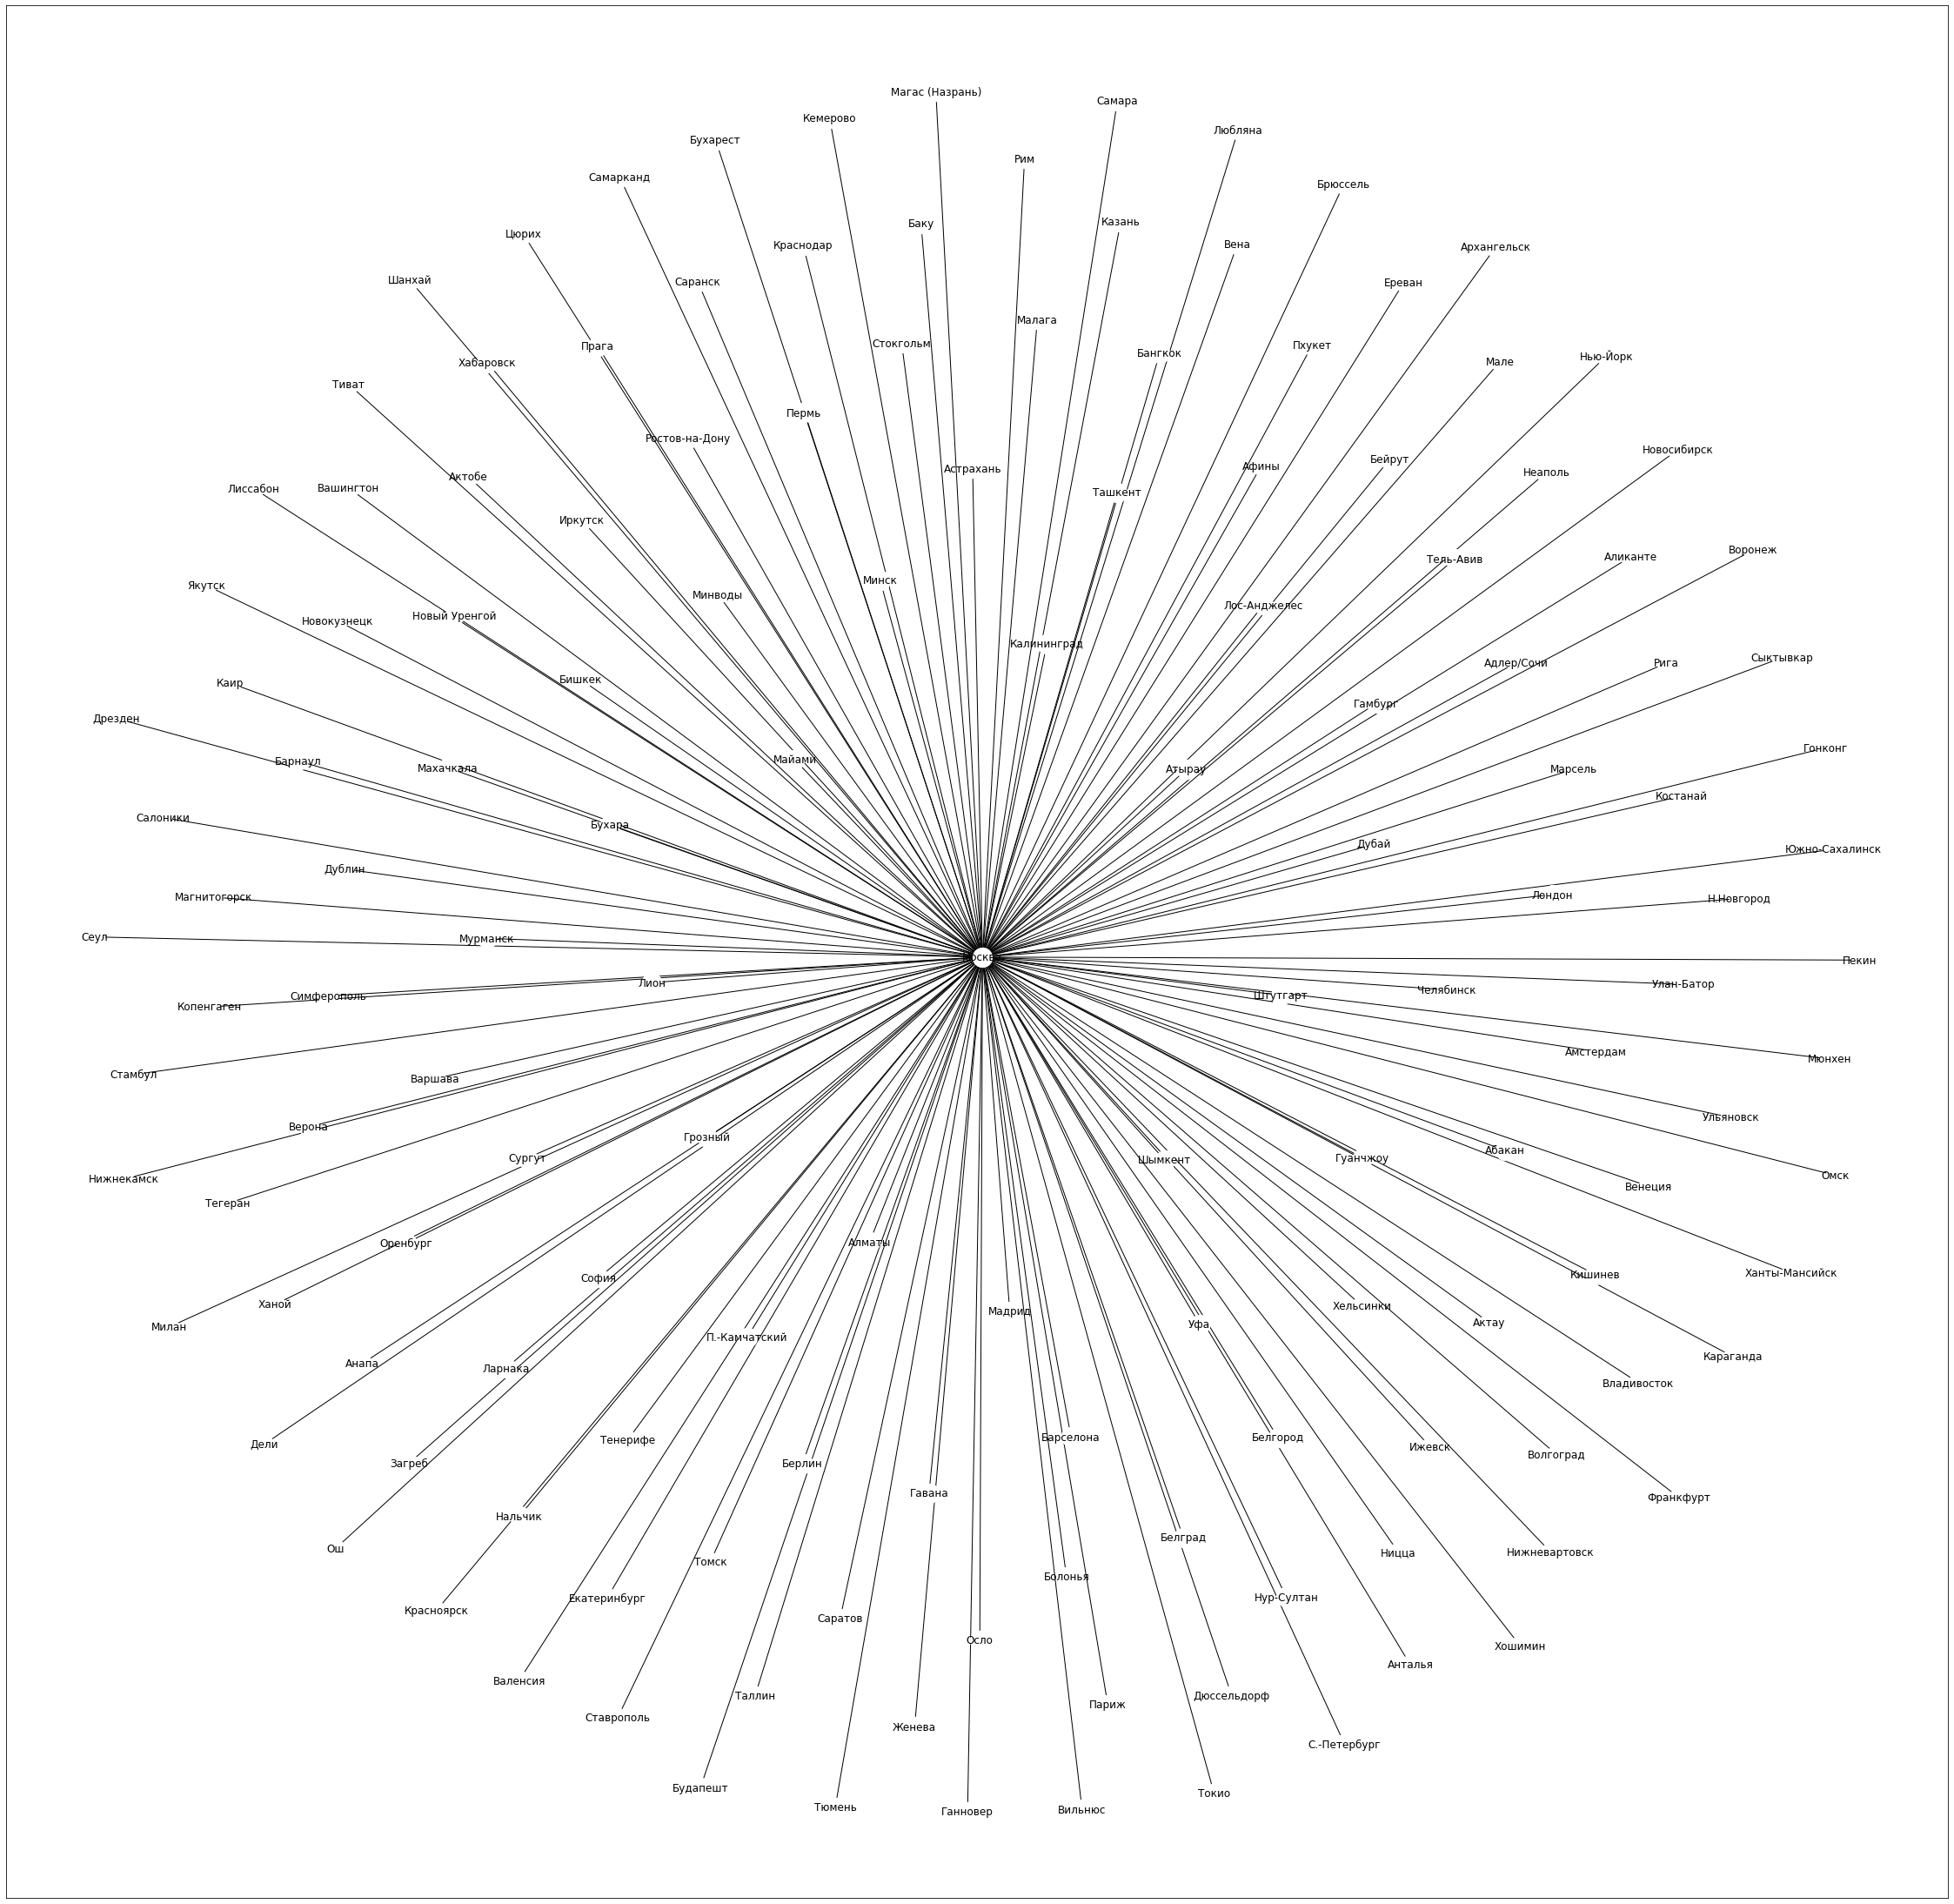

In [39]:
plt.figure(figsize=(40, 40)) 

nx.draw_networkx(g2, with_labels=True, node_color='white', node_size=500)
plt.show();

## Задание 3 (1 балл)
Выберите любую пару городов и постройте между ними следующие кратчайшие пути:
- без взвешивания
- со взвешиванием по расстоянию
- со взвешиванием по времени

Кратчайший путь между Ставрополем и Дели. Без взвешивания:

In [40]:
nx.shortest_path(g2, source='Ставрополь', target='Дели')

['Ставрополь', 'Москва', 'Дели']

Со взвешиванием по расстоянию:

In [41]:
shortest_path = nx.shortest_path(g2, source='Ставрополь', target='Дели', weight='distance')

print(shortest_path)

['Ставрополь', 'Москва', 'Дели']


In [42]:
nx.shortest_path_length(g2, source='Ставрополь', target='Дели', weight='distance')

6140

Проверим результат по датасету.

In [43]:
path_data = pd.DataFrame(columns=aeroflot_data.columns)

for (source, target) in zip(shortest_path[:-1], shortest_path[1:]):
    path_data = path_data.append(
        aeroflot_data[(aeroflot_data.source == source) & (aeroflot_data.target == target)],
        ignore_index=True
    )
    
path_data

,code,source,target,distance,duration,time_diff
0,STW,Ставрополь,Москва,1415,136,0.0
1,DEL,Москва,Дели,4660,372,2.5


In [44]:
print(path_data['distance'].sum())

6075


Со взвешиванием по времени:

In [45]:
shortest_path = nx.shortest_path(g2, source='Ставрополь', target='Дели', weight='time')

print(shortest_path)

['Ставрополь', 'Москва', 'Дели']


In [46]:
nx.shortest_path_length(g2, source='Ставрополь', target='Дели', weight='time')

531

Проверим результат по датасету.

In [47]:
path_data = pd.DataFrame(columns=aeroflot_data.columns)

for (source, target) in zip(shortest_path[:-1], shortest_path[1:]):
    path_data = path_data.append(
        aeroflot_data[(aeroflot_data.source == source) & (aeroflot_data.target == target)],
        ignore_index=True
    )
    
path_data

,code,source,target,distance,duration,time_diff
0,STW,Ставрополь,Москва,1415,136,0.0
1,DEL,Москва,Дели,4660,372,2.5


In [48]:
print(path_data['duration'].sum())

508


Поясните полученные результаты.

Для данного набора данных оба пути совпадают. Однаков, в общем случае, результаты могут не совпадать. Граф является направленным, иными словами, согласно данным, расстояние и время полета немного отличаются в зависимости от того в какую сторону осуществляется полет, этим и объясняется полученная разница в результатах работы функции `shortest_path_length` и непосредственными рассчетами на исходных данных.